In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('C://Users//hp//Downloads//happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape

(158, 12)

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
df.sample(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
56,Nicaragua,Latin America and Caribbean,57,5.828,0.05371,0.59325,1.14184,0.74314,0.55475,0.19317,0.27815,2.32407
137,Mali,Sub-Saharan Africa,138,3.995,0.05602,0.26074,1.03526,0.20583,0.38857,0.12352,0.18798,1.79293
61,Croatia,Central and Eastern Europe,62,5.759,0.04394,1.08254,0.79624,0.78805,0.25883,0.02430,0.05444,2.75414
107,Palestinian Territories,Middle East and Northern Africa,108,4.715,0.04394,0.59867,0.92558,0.66015,0.24499,0.12905,0.11251,2.04384
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009


In [8]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [9]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

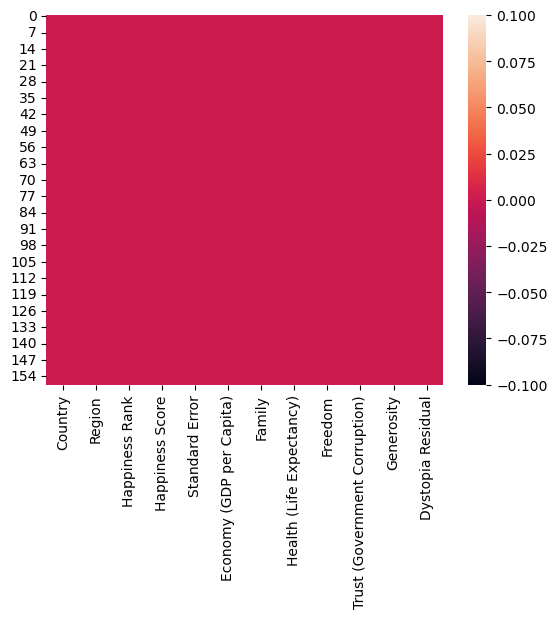

In [12]:
sns.heatmap(df.isnull())

Happiness Rank                      Axes(0.125,0.712609;0.168478x0.167391)
Happiness Score                  Axes(0.327174,0.712609;0.168478x0.167391)
Standard Error                   Axes(0.529348,0.712609;0.168478x0.167391)
Economy (GDP per Capita)         Axes(0.731522,0.712609;0.168478x0.167391)
Family                              Axes(0.125,0.511739;0.168478x0.167391)
Health (Life Expectancy)         Axes(0.327174,0.511739;0.168478x0.167391)
Freedom                          Axes(0.529348,0.511739;0.168478x0.167391)
Trust (Government Corruption)    Axes(0.731522,0.511739;0.168478x0.167391)
Generosity                           Axes(0.125,0.31087;0.168478x0.167391)
Dystopia Residual                 Axes(0.327174,0.31087;0.168478x0.167391)
dtype: object

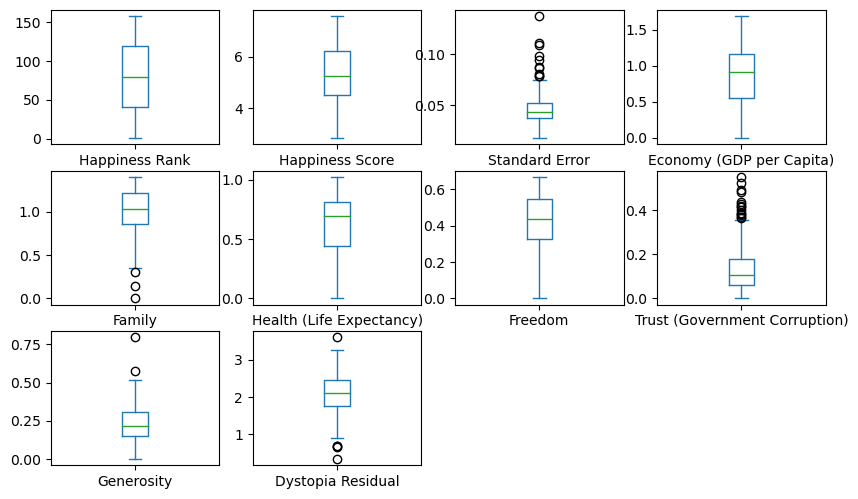

In [15]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,8))

In [16]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Axes: >

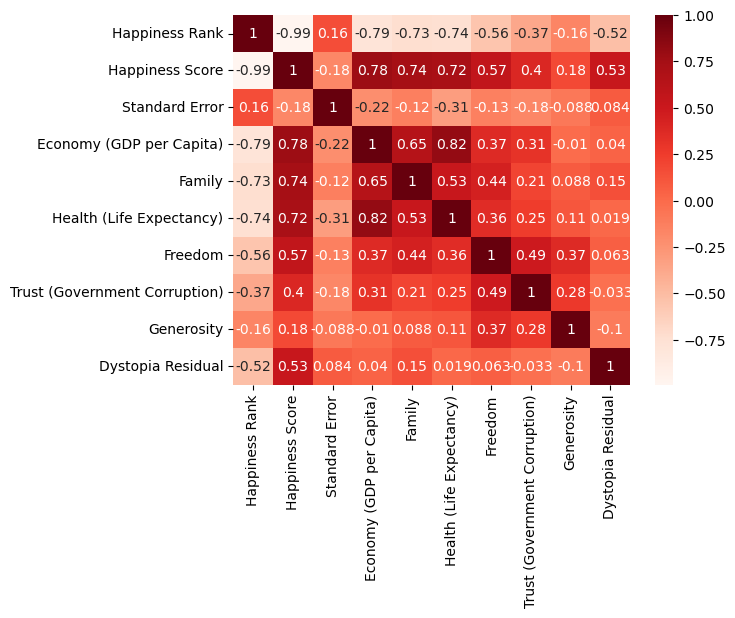

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='Reds')

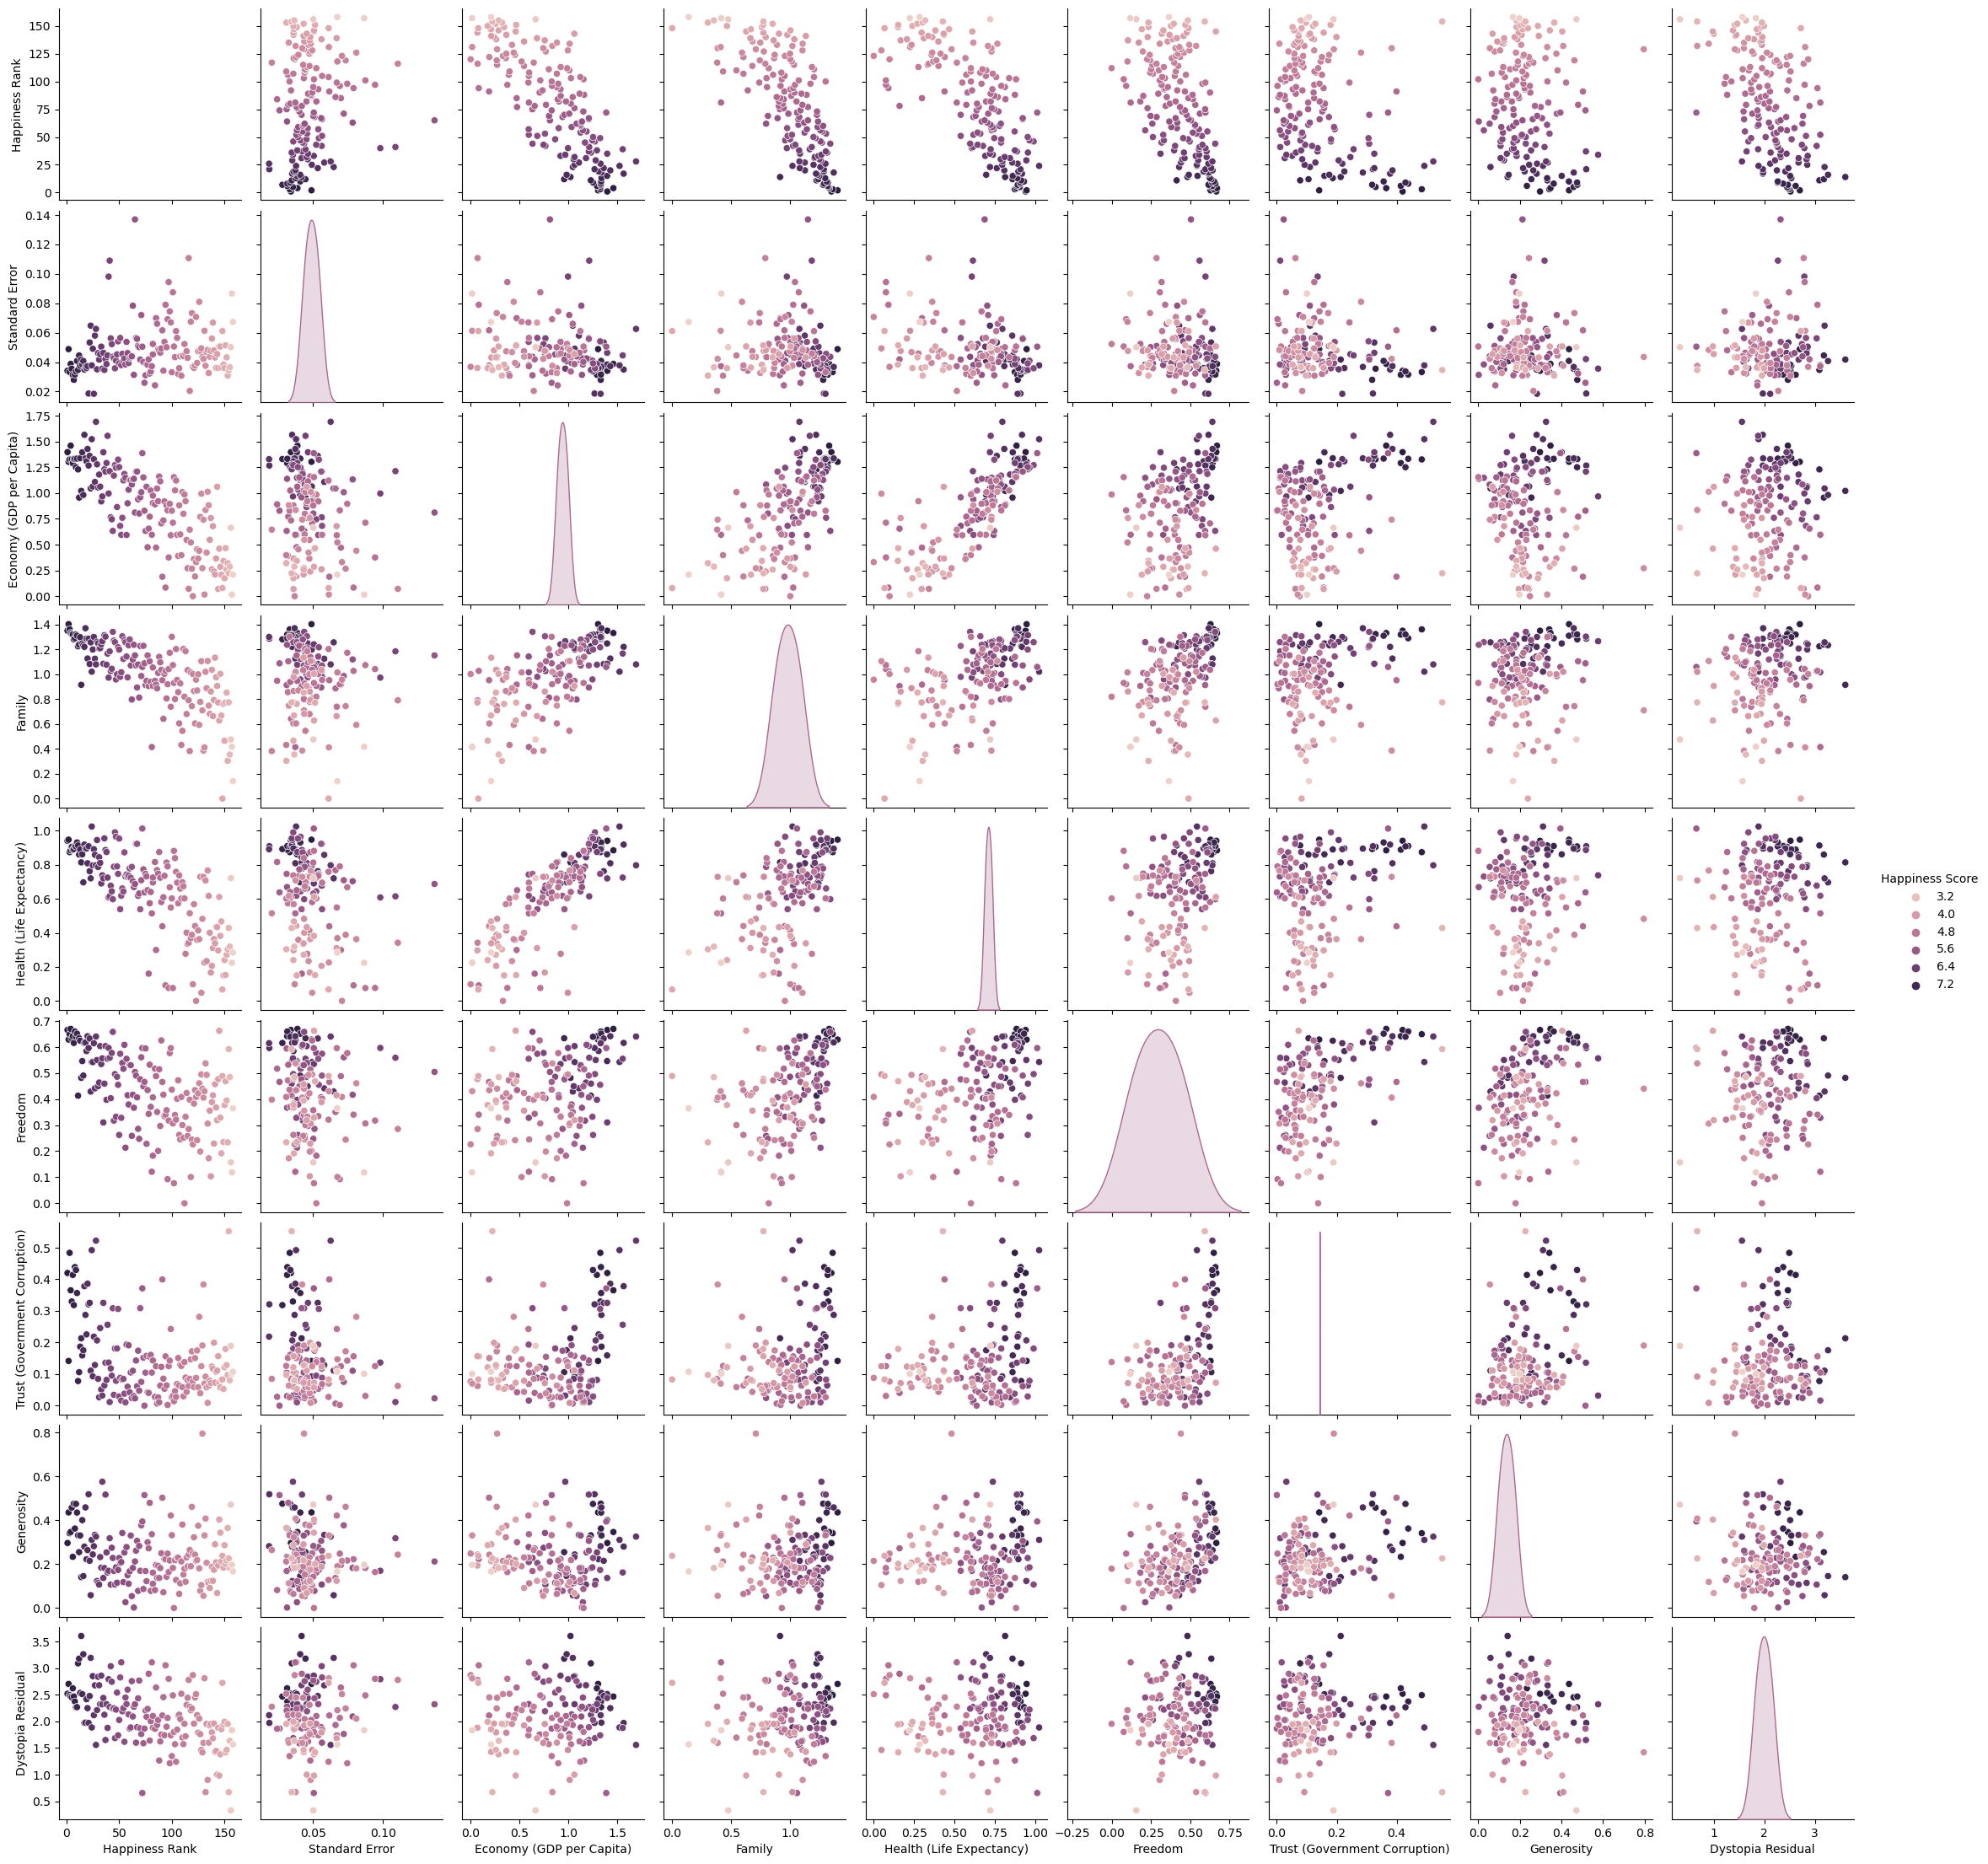

In [18]:
sns.pairplot(df,hue='Happiness Score')

In [20]:
df.drop(columns=['Region','Standard Error','Country','Dystopia Residual'],axis=1,inplace=True)

In [21]:
df

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
153,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


# Aplying Linear Regression

In [22]:
x=df.iloc[:,2:6]
y=df.iloc[:,1]

In [23]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
0,1.39651,1.34951,0.94143,0.66557
1,1.30232,1.40223,0.94784,0.62877
2,1.32548,1.36058,0.87464,0.64938
3,1.45900,1.33095,0.88521,0.66973
4,1.32629,1.32261,0.90563,0.63297
...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201
154,0.28665,0.35386,0.31910,0.48450
155,0.66320,0.47489,0.72193,0.15684
156,0.01530,0.41587,0.22396,0.11850


In [24]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [31]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(32, 4)
(32,)
(126, 4)
(126,)


In [32]:
new=LinearRegression()
new.fit(x_train,y_train)

LinearRegression()

In [33]:
new.coef_

array([0.91949607, 1.20973375, 1.06133406, 1.74411857])

In [35]:
new.intercept_

1.9604210573196106

In [36]:
new.score(x_train,y_train)

0.7493313909407139

In [37]:
result=new.predict(x_test)
print('Predicted Value',result)
print('Actual Value',y_test)

Predicted Value [4.34719967 6.56688521 4.6313975  2.92195575 4.56288874 6.05905922
 4.19985787 5.01845602 4.8381495  4.68198078 6.61250672 5.64350405
 5.94935561 5.72797197 6.17915461 6.20923761 4.1325281  4.8113478
 3.9688702  6.20103407 4.29974772 6.68936642 6.79301047 6.89499848
 6.31322396 5.51302919 4.96382679 3.92435114 4.2702302  3.79046875
 4.41465729 5.25530325]
Actual Value 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.369
146    3.681
145    3.781
75     5.332
Name: Happiness Score, dtype: float64


In [42]:
print('MSE',mean_squared_error(result,y_test))

MSE 0.23204639822946074


In [43]:
print('MAE',mean_absolute_error(result,y_test))

MAE 0.38874089949449453


In [45]:
print('RMSE',np.sqrt(mean_squared_error(result,y_test)))

RMSE 0.4817119452841716


In [46]:
print('R2 Score',r2_score(result,y_test))

R2 Score 0.7843520174506401


The above results shows that less is the root mean squared error more good the model will predict.